# Predicting Healthcare Insurance Costs

A Datacamp project provided by [Keith Galli](https://www.youtube.com/watch?v=mpfU9n4MzBE) in GitHub

In [118]:
## importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## import train data and test data

df_train = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/insurance.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/validation_dataset.csv')


## Investigating the Data

In [50]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [52]:
df_train['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', nan, 'M'], dtype=object)

In [53]:
df_train['smoker'].unique()

array(['yes', 'no', nan], dtype=object)

In [54]:
df_train['region'].unique()

array(['southwest', 'Southeast', 'southeast', 'northwest', 'Northwest',
       'Northeast', 'northeast', 'Southwest', nan], dtype=object)

In [55]:
df_train['charges'].unique()

array(['16884.924', '1725.5523', '$4449.462', ..., '$1629.8335',
       '2007.945', '29141.3603'], dtype=object)

In [43]:
df_train['age'].unique()

array([ 19.,  18.,  28.,  33.,  32., -31.,  46.,  37.,  60.,  25.,  62.,
        23.,  56., -27.,  52., -23.,  30., -34.,  59.,  63.,  55.,  31.,
        22.,  nan,  26.,  35.,  24.,  41.,  21.,  48.,  36.,  40.,  58.,
        34.,  43.,  64.,  20.,  61.,  27.,  53.,  44.,  57., -41.,  45.,
       -35.,  54.,  38.,  29.,  49.,  47.,  51.,  42.,  50., -44., -39.,
       -28., -40.,  39., -25., -52., -26., -47., -45., -57., -43., -50.,
       -58., -56., -30., -51., -60., -37., -55., -64., -22., -36., -21.,
       -18., -20., -19., -33.])

In [44]:
df_train.isna().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

### Conclusions and next steps

From an initial investigation of the trainig data set, we need to do some clean ups:
- Standardize de observations in the `sex & region` columns;
- Change `children` column  type to `int64`;
- Remove the `$` from the `charges` column;
- Remove the negative sings from the observations in the `age & children` columns;
- Drop the `na` values.


## Cleaning up the Data

In [119]:
## first lest drop the na values

df_train = df_train.dropna()

In [120]:
## changing the type the children column

df_train['children'] = df_train['children'].astype(int)
df_train['region'] = df_train['region'].str.lower()
df_train['charges'] = df_train['charges'].str.strip('$').astype('float64')

In [121]:
## since no columns should have negative values, we convert the hole data set to the absolute values with the .abs() method

df_train['children'] = df_train['children'].abs()
df_train['age'] = df_train['age'].abs()

In [122]:
## now we create a dict to standardize the sex column into two variables

FEMALE = 'female'
MALE = 'male'
sex_map = {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

df_train['sex'] = df_train['sex'].replace(sex_map)

In [108]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


## Exploration Data Analysis

Now with a clean data set, we can explore the relationships between the data

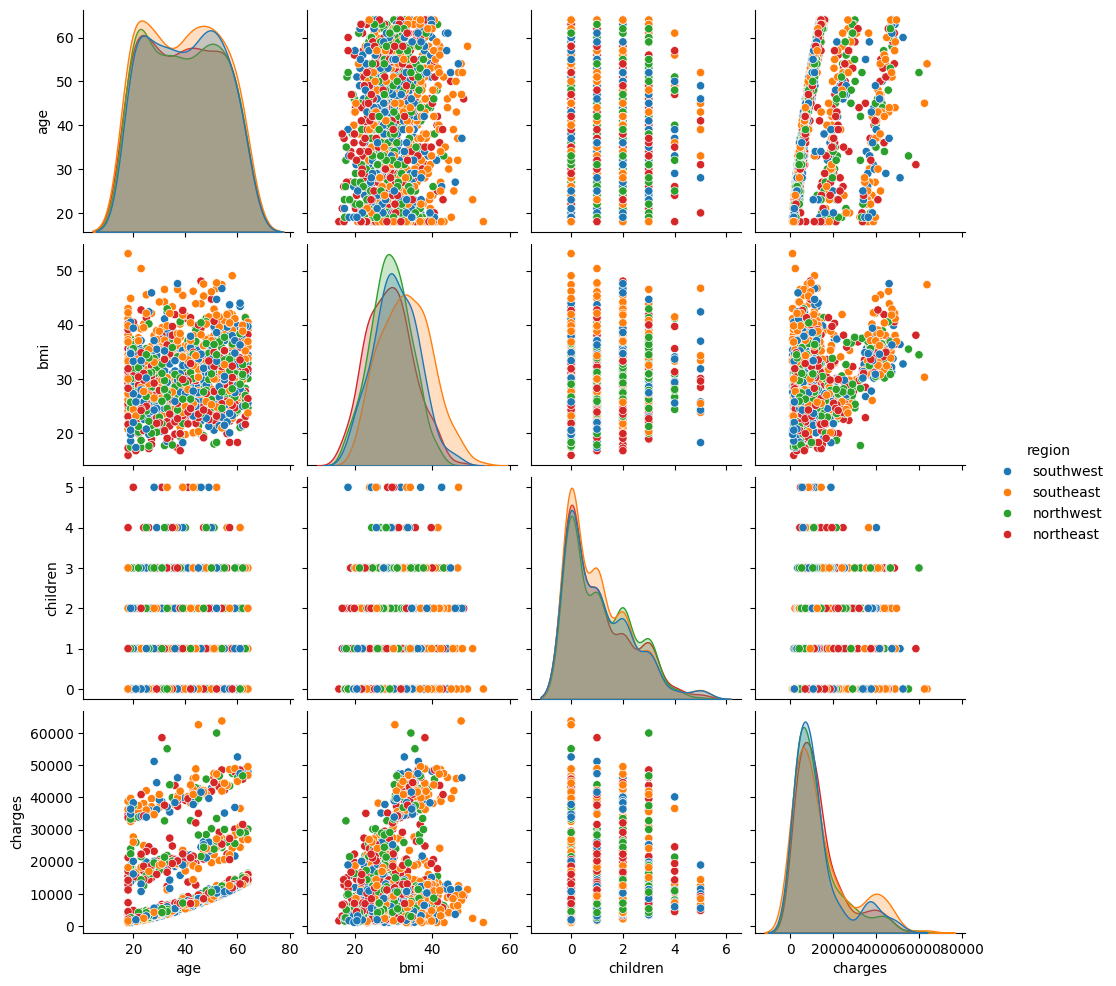

In [71]:
sns.pairplot(data=df_train, hue='region')
plt.show()

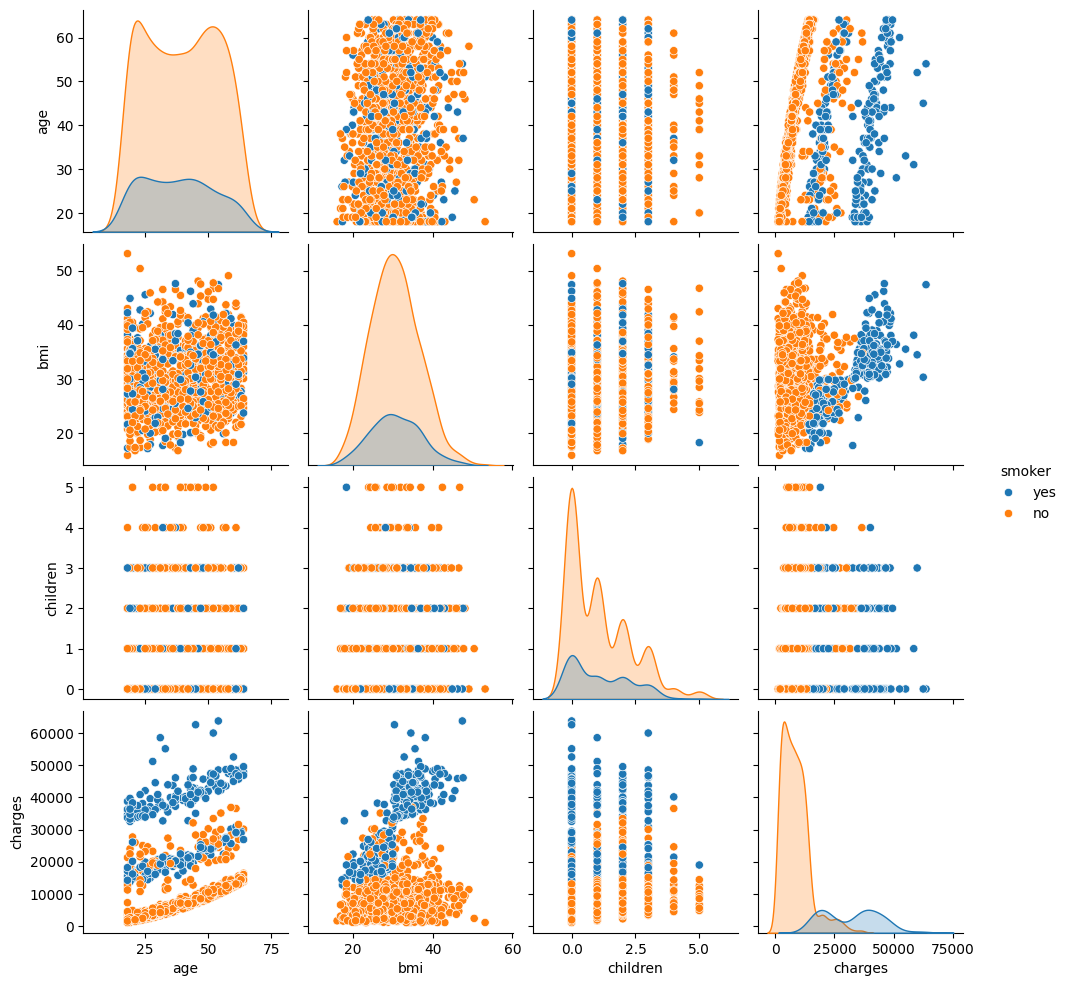

In [72]:
sns.pairplot(data=df_train, hue='smoker')
plt.show()

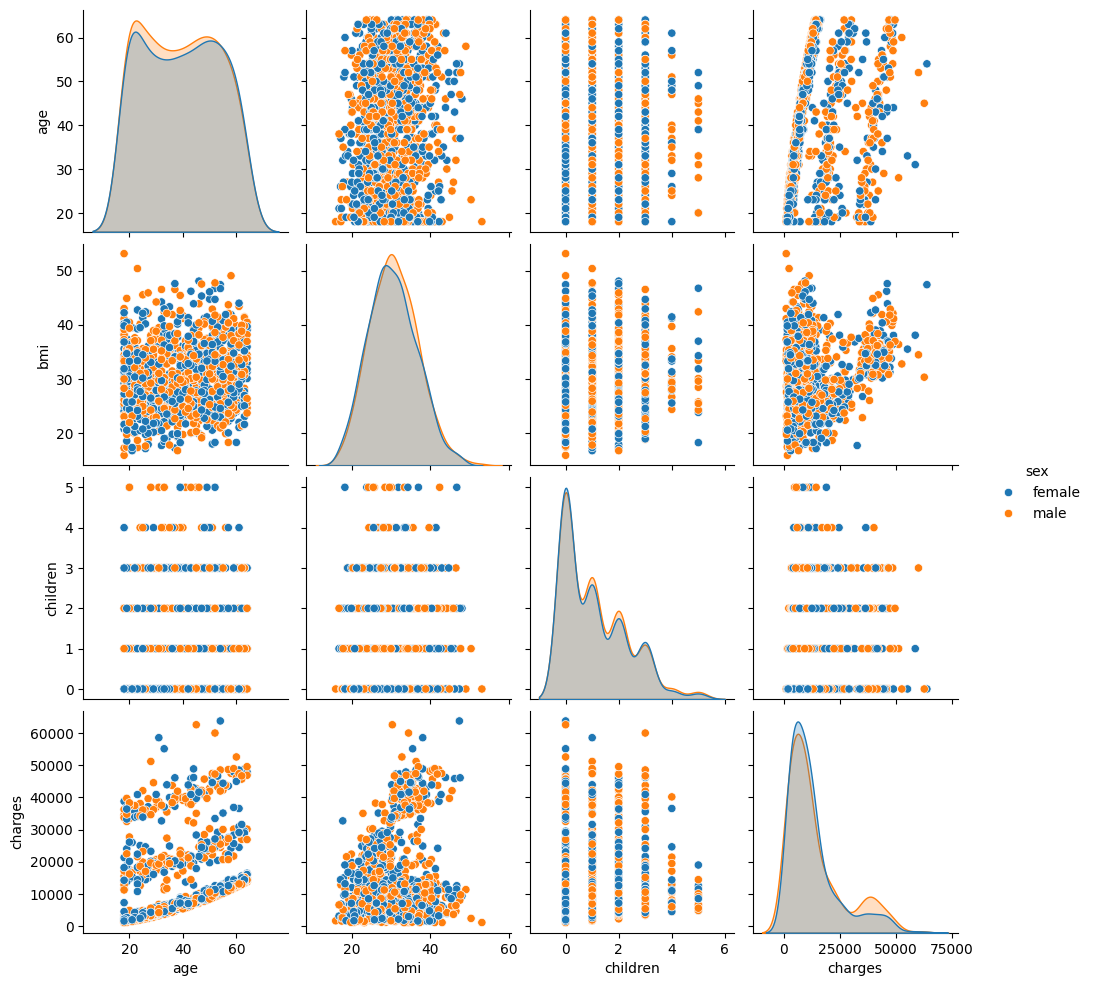

In [73]:
sns.pairplot(data=df_train, hue='sex')
plt.show()

### Conclusions and next steps

From the pairplots above, there's no clear relation between the data regardin region or sexa and the response (charges). However, there's some indication that the variables *age, bmi, smokers and children*, may have some effect in the response.

## Building the Model

The variables that we choose to use in the model are: `age`, `bmi`, `children` and `smoker`

Linear Regression is a numerical model, so we need to change the categorical data `smoker` into 0s and 1s, 0 meaning non-smoker.

In [123]:
## changing to boolean
df_train['smoker'] = (df_train['smoker'] == 'yes')
## changing to 0 and 1, 0 = False meaning non-smoker
df_train['smoker'] = df_train['smoker'].astype('int64')


## creating a new data set with only the variables we will use in the model
df_train_new = df_train[['age', 'bmi', 'smoker','children', 'charges']]

df_train_new = df_train_new.dropna()

df_train_new.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1207 non-null   float64
 1   bmi       1207 non-null   float64
 2   smoker    1207 non-null   int64  
 3   children  1207 non-null   int32  
 4   charges   1207 non-null   float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 51.9 KB


In [124]:
## processing the test data set

df_test = df_test[['age','bmi', 'smoker', 'children']]

df_test['smoker'] = (df_test['smoker'] == 'yes')

df_test['smoker'] = df_test['smoker'].astype('int64')

df_test.head()

,age,bmi,smoker,children
0,18.0,24.090000,0,1.0
1,39.0,26.410000,1,0.0
2,27.0,29.150000,1,0.0
3,71.0,65.502135,1,13.0
4,28.0,38.060000,0,0.0


In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

## defining output and input

X = df_train_new.drop(columns=['charges'])
y = df_train_new['charges']

## split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## create and train the model

model = LinearRegression()
model.fit(X_train, y_train)

## Make the predictions

y_pred = model.predict(X_test)


## calculate the R square

r2_score = r2_score(y_test, y_pred)

## print the value

r2_score


0.7041520190930628

## Implement and evaluate the Model

In [127]:
predictions = model.predict(df_test)

df_predicted = df_test.copy()

df_predicted['predicted_charges'] = predictions

df_predicted.head()

,age,bmi,smoker,children,predicted_charges
0,18.0,24.090000,0,1.0,712.339872
1,39.0,26.410000,1,0.0,30742.261491
2,27.0,29.150000,1,0.0,28323.570099
3,71.0,65.502135,1,13.0,57258.254237
4,28.0,38.060000,0,0.0,7166.494000
